# Diabetes Prediction Using Decision Tree
In this notebook, we will build a decision tree model to predict whether a subject has diabetes based on features such as age, blood pressure, and BMI. The dataset we are using is the **Pima Indians dataset**, which contains 768 records and is available in the UCI Machine Learning Repository. The dataset has been divided into training (80%) and testing (20%) sets.

A **decision tree** is a flowchart-like structure where:
- Each internal node represents a feature (or attribute),
- The branches represent decision rules,
- The leaf nodes represent the outcome or prediction.

The decision tree splits data recursively based on feature values, making it easy to interpret and visualize.


Diabetes Prediction Using Decision Tree

We will build a decision tree to predict diabetes for subjects in the Pima Indians dataset based on predictor variables such as age, blood pressure, and bmi.

<center><img src='https://i.imgur.com/6Fam41M.png'></center>

A subset of the **Pima Indians data** from the UCI Machine Learning Repository is a built-in dataset in the MASS library. The Pima data in MASS contains 768 complete records from the original dataset.

These **768 records** have been broken down into two dataframes: Train dataframe has 80% and Test dataframe has 20% of total subjects. All records with zeros that don’t make sense have been cleaned out of these datasets.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It’s visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

# Load Libraries
In this step, we import the necessary libraries:
- **pandas** and **numpy** for data manipulation and handling.
- **DecisionTreeClassifier** from **sklearn.tree** to build the decision tree model.
- **train_test_split** from **sklearn.model_selection** to split the dataset into training and testing sets.
- **metrics** for evaluating the performance of our model.


In [1]:
# Load libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Load the Dataset
We load the diabetes dataset using pandas. The dataset is assumed to be stored as a CSV file named "diabetes.csv".


In [2]:
data = pd.read_csv(r"diabetes.csv")

# Displaying the First Few Rows of the Dataset
We use the `head()` function to display the first few rows of the dataset. This allows us to quickly examine the data and check if it has loaded correctly.


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking the Shape of the Dataset
Here, we check the shape of the dataset to know how many rows and columns it contains. This helps us understand the size of the data we're working with.


In [4]:
data.shape

(768, 9)

# Assigning Column Names
We define a list of column names for the dataset and assign them to the dataframe. This improves readability and makes it easier to work with the data.


In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Display the First Few Rows Again After Renaming Columns
We use the `head()` function again to display the first few rows after renaming the columns to ensure that the changes were applied correctly.


In [6]:
data.columns = col_names

In [7]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Split Dataset into Features and Target Variable
We separate the dataset into two parts:
- **X**: The features (input variables like glucose, age, etc.)
- **y**: The target variable (label column indicating whether the person has diabetes).


In [8]:
#split dataset in features and target variable

X = data.drop(columns = 'label') # Features
y = data['label'] # Target variable

# Split Dataset into Training Set and Test Set
Here, we split the data into training and testing sets using `train_test_split`. 80% of the data is used for training, and 20% is used for testing. The random_state ensures that the split is reproducible.


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check the Shape of the Training Set
We use the `shape` function to check the dimensions of the training set `X_train`. This helps us confirm that the dataset was split correctly.


In [10]:
X_train.shape

(614, 8)

# Check for Missing Values in the Training Set
We check for missing values in the training dataset using the `isna().sum()` function. This is important because missing values can negatively affect the performance of the model.


In [11]:
X_train.isna().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0


# Check the Shape of the Test Set
We check the shape of the test dataset `X_test` to confirm that it has the expected number of samples after the split.


In [12]:
X_test.shape

(154, 8)

# Create Decision Tree Classifier Object
We create a **DecisionTreeClassifier** object called `clf`. This object will be used to build the decision tree model.


In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier
Here, we train the decision tree classifier (`clf`) using the training data (`X_train` and `y_train`). This step builds the decision tree based on the training data.


In [14]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the Response for the Test Dataset
After training the model, we use the `predict()` function to predict the labels for the test dataset (`X_test`). The predicted values are stored in `y_pred`.


In [15]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the Model on the Training Set
We use the `score()` function to evaluate the performance of the decision tree classifier on the training data. This function calculates the accuracy (the proportion of correct predictions).


In [16]:
clf.score(X_train,y_train)

1.0

# Evaluate the Model on the Test Set
We use the `score()` function again to evaluate the model’s performance on the test dataset. This helps us understand how well the model generalizes to unseen data.


In [17]:
clf.score(X_test,y_test)

0.6883116883116883

# Model Accuracy
We use the `accuracy_score()` function from `metrics` to calculate how often the model's predictions are correct on the test set.


In [18]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


# Classification Report
Finally, we use the `classification_report()` function from `metrics` to generate a detailed report on the model's performance, including precision, recall, and F1 score for each class.


In [19]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        99
           1       0.56      0.56      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



# Print the Decision Tree
This code prints the structure of the trained decision tree model. It shows the parameters used by the decision tree classifier after training.


In [20]:
print(clf)

DecisionTreeClassifier()


# Visualize the Decision Tree
Here, we visualize the decision tree using `plot_tree` from sklearn. This visualization shows how the decision tree splits the data based on features, and it helps to understand the decision-making process of the model.


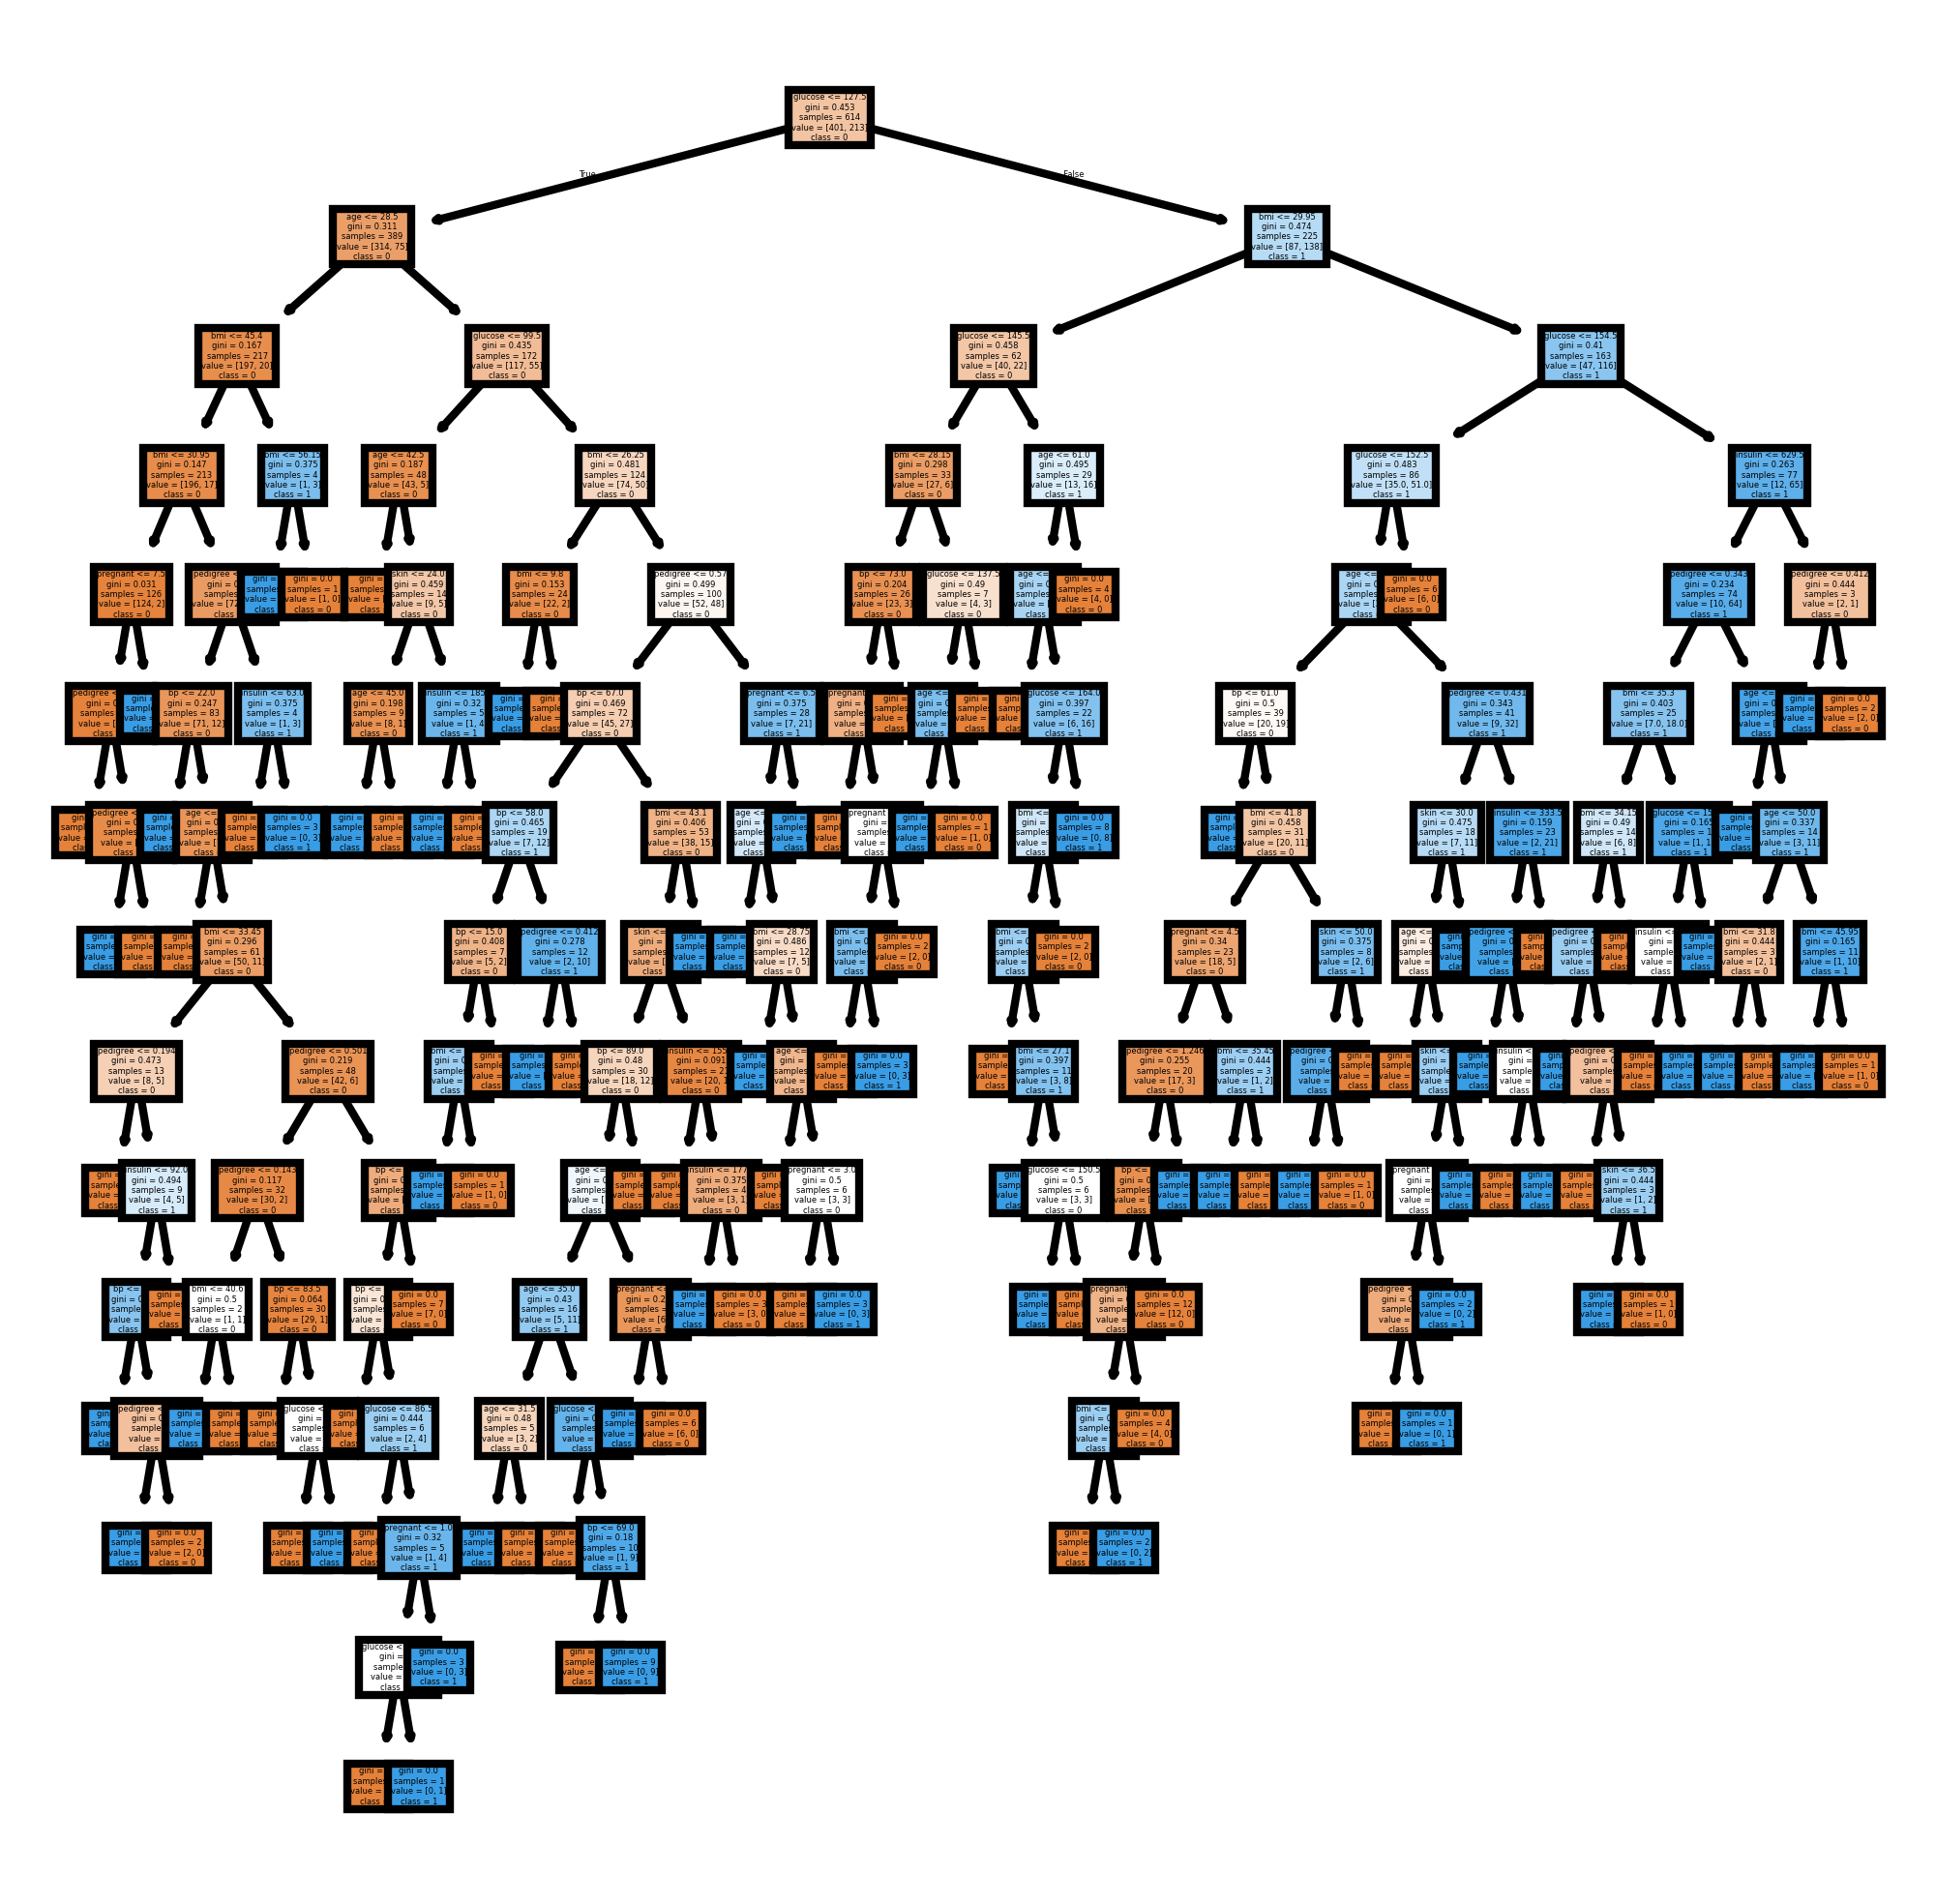

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = col_names,
               class_names=['0','1'],
               filled = True);

fig.savefig('imagename.png')

# Tree Optimization


This section explains how you can optimize the decision tree classifier by tuning various hyperparameters. It discusses parameters such as:
- **criterion**: This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.
- **splitter**: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered. The split will then be made by the best feature within the random subset. The size of the random subset is determined by the max_features parameter.
- **max_depth**: This determines the maximum depth of the tree. In our case, we use a depth of two to make our decision tree. The default value is set to none. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting.
- **min_samples_split**: The minimum number of samples a node must contain to consider splitting. The default value is two. You can use this parameter to regularize your tree.
- **min_samples_leaf**: The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree.
- **max_features**: The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider all features available to make the best split. Depending on your application, it’s often a good idea to tune this parameter.


In [22]:
parameterstree = DecisionTreeClassifier(criterion = "entropy",
                                        splitter = "random",
                                        max_depth = 2,
                                        min_samples_split = 5,
                                        min_samples_leaf = 5,
                                        max_features = 5,
                                       random_state=206)

# Fitting the Decision Tree Classifier Model

In this line, the decision tree classifier (`parameters_tree`) is trained using the training data (`X_train` and `y_train`). Here's a breakdown of what happens:

1. **parameters_tree**:
   - This is the **DecisionTreeClassifier** object we initialized earlier with specific hyperparameters (e.g., `criterion`, `splitter`, `max_depth`, etc.).

2. **fit()**:
   - The `fit()` method is used to train the model. It takes the training data and its corresponding labels as input.
   - The model learns from the features (`X_train`) and the target values (`y_train`) in the training dataset. This involves:
     - Finding the best feature splits based on the chosen **criterion** (in this case, "entropy").
     - Recursively partitioning the data into nodes until the stopping conditions (e.g., `max_depth`, `min_samples_split`) are met.

3. **X_train**:
   - This represents the **features** in the training dataset. It is a 2D array or DataFrame where each row is an instance (or sample) and each column is a feature (e.g., glucose, age, etc.).

4. **y_train**:
   - This represents the **target variable** (or labels) in the training dataset. It is a 1D array or Series, where each value corresponds to the class or target for the respective instance in `X_train`.



In [23]:
parameterstree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=5,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=206, splitter='random')

# Predicting the Target Values with the Trained Decision Tree
The `predict()` method uses the trained decision tree model (`parameterstree`) to predict the target labels for the test data (`X_test`). The predictions are stored in `y_pred_param`, which contains the model’s predicted labels for each test instance based on learned patterns.


In [24]:
y_pred_param = parameterstree.predict(X_test)

# Evaluating the Model's Performance on the Training Set
The `score()` method calculates the accuracy of the trained decision tree model (`parameterstree`) on the training data (`X_train` and `y_train`). It compares the predicted labels with the true labels and computes the proportion of correct predictions, representing the model's performance on the training set.


In [25]:
parameterstree.score(X_train,y_train)

0.739413680781759

# Evaluating the Model's Performance on the Test Set
The `score()` method evaluates the accuracy of the trained decision tree model (`parameterstree`) on the test data (`X_test` and `y_test`). It compares the predicted labels with the actual labels and calculates the proportion


In [26]:
parameterstree.score(X_test,y_test)

0.7207792207792207

# Accuracy Calculation
The `accuracy_score()` function from the `metrics` module calculates the accuracy of the model by comparing the predicted labels (`y_pred_param`) with the actual labels (`y_test`). It returns the proportion of correct predictions and prints the result.


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.7207792207792207


# Classification Report
The `classification_report()` function from `metrics` generates a detailed report on the model's performance. It includes metrics such as precision, recall, and F1 score for each class. The function compares the predicted labels (`y_pred_param`) with the true labels (`y_test`) to evaluate how well the model performs on each class.


In [28]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       112
           1       0.49      0.64      0.56        42

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.75      0.72      0.73       154



# Visualizing the Decision Tree

This code visualizes the trained decision tree model (`parameterstree`) using `plot_tree` from `sklearn.tree`.

1. **import matplotlib.pyplot as plt**:
   - Imports the `matplotlib.pyplot` library for creating plots and visualizations.

2. **fig, axes = plt.subplots(...)**:
   - Creates a figure and axes object using `subplots()` to set up the plotting area. The `figsize` parameter controls the size of the figure (4x4 inches), and `dpi` controls the resolution (100 dots per inch).

3. **tree.plot_tree(parameterstree, ...)**:
   - Visualizes the decision tree model (`parameterstree`) as a flowchart.
   - **feature_names = col_names**: Uses the `col_names` list to label the features in the tree.
   - **class_names = ['0', '1']**: Labels the classes as `0` and `1` for binary classification (e.g., "0" = negative, "1" = positive).
   - **filled = True**: Colors the nodes based on their class and impurity level to make the tree easier to interpret.


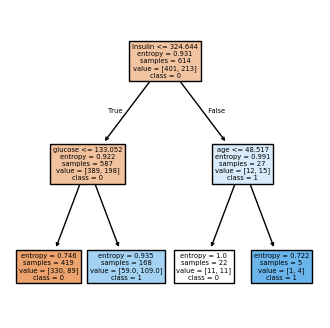

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
tree.plot_tree(parameterstree,
               feature_names = col_names,
               class_names=['0','1'],
               filled = True);

## Model With Gini Index

# Model with Gini Index

In this code, we are training a **Decision Tree Classifier** with the **Gini Index** as the criterion for splitting the nodes. The Gini index measures the impurity or purity of a node. The goal is to split the data at each node such that the data in each child node is as pure as possible.

1. **criterion="gini"**:
   - The `criterion` parameter defines the function to measure the quality of a split. Here, **Gini impurity** is used, which calculates the likelihood of an incorrect classification of a randomly chosen element from the dataset.
   - A Gini index of 0 indicates perfect purity (all instances at the node belong to the same class), and higher values indicate more impurity.

2. **random_state=206**:
   - The `random_state` ensures that the randomness in the model, such as in the tree building process, is reproducible. By setting this to a fixed value (206), the results will be consistent across different runs of the code.

3. **fit()**:
   - The `fit()` method is used to train the decision tree model on the **training data** (`X_train` and `y_train`). The model will learn the relationships between the features (`X_train`) and the target variable (`y_train`) by creating splits based on the Gini impurity.


In [30]:
parameterstree = DecisionTreeClassifier(criterion = "gini",
                                        splitter = "random",
                                        max_depth = 2,
                                        min_samples_split = 5,
                                        min_samples_leaf = 5,
                                        max_features = 5,
                                       random_state=206)

# Training, Predicting, and Evaluating the Decision Tree Model

1. **parameterstree.fit(X_train, y_train)**:
   - The `fit()` method is used to train the decision tree model (`parameterstree`) using the **training data** (`X_train`) and the **target labels** (`y_train`). This step allows the model to learn patterns and relationships from the data in order to make predictions.

2. **y_pred_param = parameterstree.predict(X_test)**:
   - The `predict()` method generates predictions for the **test dataset** (`X_test`). The trained decision tree model uses the features in `X_test` to predict the target labels. The predicted labels are stored in the `y_pred_param` variable.

3. **parameterstree.score(X_train, y_train)**:
   - The `score()` method is used to evaluate the performance of the model on the **training data** (`X_train` and `y_train`). It computes the **accuracy** of the model by comparing the predicted labels for the training data with the actual labels (`y_train`). The accuracy is returned as a proportion of correct predictions.




In [31]:
parameterstree.fit(X_train,y_train)
y_pred_param = parameterstree.predict(X_test)
parameterstree.score(X_train,y_train)

0.739413680781759

# Evaluating the Model's Performance on the Test Set

The `score()` method evaluates the performance of the trained decision tree model (`parameterstree`) on the **test dataset** (`X_test` and `y_test`). It calculates the **accuracy** of the model by comparing the predicted labels with the actual labels (true values).

- **X_test**: The test features that the model has not seen during training.
- **y_test**: The true target labels for the test data.

The `score()` method returns the **accuracy**, which is the proportion of correct predictions made by the model for the test data.




In [32]:
parameterstree.score(X_test,y_test)

0.7207792207792207

# Accuracy Calculation

This line of code calculates the **accuracy** of the model by comparing the true labels (`y_test`) with the predicted labels (`y_pred_param`).

- **y_test**: The actual target labels for the test set.
- **y_pred_param**: The predicted labels generated by the model for the test set.

The `accuracy_score()` function from `metrics` computes the proportion of correct predictions by comparing the predicted labels with the true labels and returns the accuracy value. The accuracy is then printed.

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.7207792207792207


# Classification Report

The `classification_report()` function from `metrics` generates a detailed report on the performance of the model. It evaluates the model's predictions (`y_pred_param`) by comparing them with the true labels (`y_test`).

This report includes key classification metrics such as:
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
- **F1-Score**: The weighted average of precision and recall.
- **Support**: The number of actual occurrences of the class in the dataset.


In [34]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       112
           1       0.49      0.64      0.56        42

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.75      0.72      0.73       154



# Visualizing the Decision Tree

This code visualizes the trained decision tree model (`parameterstree`) using `plot_tree` from `sklearn.tree`:

1. **import matplotlib.pyplot as plt**:
   - Imports the `matplotlib.pyplot` library, which is used to create visualizations and plots.

2. **fig, axes = plt.subplots(...)**:
   - Creates a figure and axes for plotting. The `figsize=(4, 4)` sets the size of the plot to 4x4 inches, and `dpi=150` sets the resolution to 150 dots per inch for clearer visuals.

3. **tree.plot_tree(parameterstree, ...)**:
   - This function visualizes the decision tree:
     - **feature_names=col_names**: Labels the tree nodes with feature names from the list `col_names`.
     - **class_names=['0', '1']**: Labels the two classes (0 and 1) for binary classification.
     - **filled=True**: Colors the nodes based on their class and impurity level, making it easier to interpret the tree structure.


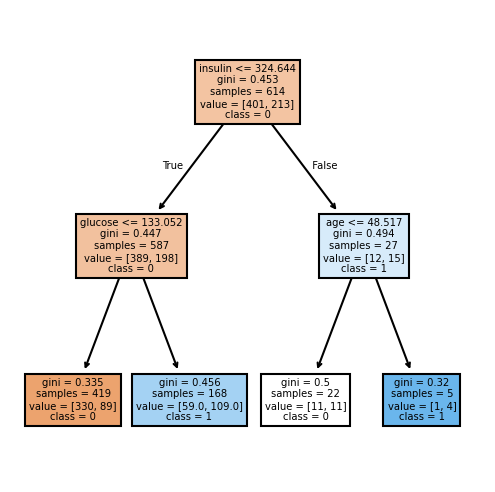

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(parameterstree,
               feature_names = col_names,
               class_names=['0','1'],
               filled = True);

# Ensemble Learning

# Ensemble Learning
In this section, we explore **Ensemble Learning**, a powerful technique in machine learning where multiple models are combined to improve performance. The goal is to reduce errors and increase accuracy by leveraging the strengths of various models.

Ensemble learning typically includes:
1. **Bagging (Bootstrap Aggregating)**:
   - Multiple models are trained in parallel on different random subsets of the data. Their predictions are combined to reduce variance. Random Forest is an example of bagging.
   
2. **Boosting**:
   - Models are trained sequentially, with each model focusing on correcting errors made by the previous one. Examples include Gradient Boosting and AdaBoost.

3. **Stacking**:
   - Multiple models are trained, and their outputs are combined by a meta-learner to enhance performance.


## Random Forest

# Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve performance and reduce overfitting. It is a type of **Bagging** (Bootstrap Aggregating) technique, where the goal is to train several models (decision trees in this case) on different random subsets of the data, and then combine their predictions.

### Key Characteristics of Random Forest:
1. **Bootstrapping**:
   - Each decision tree is trained on a **random subset** of the original data (with replacement), which helps reduce variance and avoid overfitting.
   
2. **Random Feature Selection**:
   - At each split in the decision tree, a random subset of features is selected rather than using all features. This increases diversity among the trees and further helps to reduce overfitting.

3. **Ensemble of Decision Trees**:
   - Random Forest aggregates predictions from many individual decision trees to make the final prediction. For classification tasks, the final output is the class with the majority vote from all trees. For regression tasks, it is the average of all the tree outputs.

### Advantages of Random Forest:
- **High accuracy**: By combining multiple trees, Random Forest typically performs better than a single decision tree.
- **Reduces overfitting**: Randomization and bagging help mitigate overfitting, especially in complex datasets.
- **Handles large datasets well**: Random Forest can handle both large feature spaces and large datasets effectively.



# Initializing the Random Forest Classifier

1. **from sklearn.ensemble import RandomForestClassifier**:
   - This imports the **RandomForestClassifier** class from the `sklearn.ensemble` module. The RandomForestClassifier is used to create and train a random forest model, which is an ensemble of decision trees.

2. **classifier = RandomForestClassifier(n_estimators=100, random_state=0)**:
   - **n_estimators=100**: This parameter specifies the number of decision trees in the random forest. Here, we are using **100 trees**. More trees typically lead to better performance and reduced overfitting, but also increase computation time.
   - **random_state=0**: This ensures that the random processes in the algorithm (such as random sampling of data and features) are reproducible. Setting a specific value (like 0) guarantees that the results will be the same every time the code is run.


In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Making Predictions with the Trained Model

The `predict()` method is used to generate predictions using the trained model (`clf`) on the **test data** (`X_test`).

1. **clf**:
   - This is the **RandomForestClassifier** or any classifier model that has been previously trained using the `fit()` method. In this case, it could be the `RandomForestClassifier` initialized earlier.

2. **predict(X_test)**:
   - The `predict()` method uses the trained model to make predictions on the test data (`X_test`). The model applies the patterns it learned from the training data to the test instances and outputs the predicted class labels.

3. **ypred**:
   - The predictions made by the model are stored in the variable `ypred`. It is a 1D array or list containing the predicted labels for each instance in the test set.




In [37]:
ypred = clf.predict(X_test)

# Evaluating the Model's Accuracy

1. **from sklearn.metrics import accuracy_score**:
   - This imports the `accuracy_score` function from the `sklearn.metrics` module. The `accuracy_score` function is used to calculate the accuracy of the model's predictions by comparing the true labels with the predicted labels.

2. **accuracy_score(y_test, ypred)**:
   - The `accuracy_score` function compares the true labels (`y_test`) with the predicted labels (`ypred`).
   - It calculates the proportion of correct predictions: the number of correct predictions divided by the total number of predictions. The result is the accuracy of the model.

3. **print(accuracy_score(y_test, ypred))**:
   - The `print()` function outputs the accuracy score, showing how well the model's predictions match the actual labels in the test set (`y_test`).




In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6883116883116883


## Randomized Search CV

# Randomized Search CV

**Randomized Search Cross-Validation** (RandomizedSearchCV) is a method used for hyperparameter tuning in machine learning models. It is a more efficient way of finding the best hyperparameters compared to **Grid Search CV**, as it randomly samples a subset of the hyperparameter space, rather than evaluating all combinations.

### Key Points:
1. **Hyperparameter Tuning**:
   - Machine learning models, such as decision trees or random forests, have hyperparameters that need to be set before training. These include parameters like `n_estimators`, `max_depth`, and `learning_rate`.
   - Finding the optimal values for these parameters can significantly improve the model's performance.

2. **Randomized Search**:
   - Instead of testing all possible combinations of hyperparameters, **RandomizedSearchCV** samples a fixed number of hyperparameter combinations randomly. This method is faster than **GridSearchCV**, which exhaustively searches through all possible combinations.

3. **Cross-Validation**:
   - Randomized Search typically uses **cross-validation** to evaluate the performance of each hyperparameter combination. This means that the dataset is split into multiple parts, and the model is trained and evaluated on different subsets of the data to avoid overfitting.

4. **Advantages**:
   - **Faster than Grid Search**: It does not evaluate all combinations, so it can explore the hyperparameter space more efficiently.
   - **Better exploration of the parameter space**: It’s more likely to find a good combination of hyperparameters within fewer trials, especially in large spaces.



# Random Forest Hyperparameter Space (`rf_params`)

This dictionary defines a set of hyperparameters (`rf_params`) for tuning a Random Forest model, to be used with techniques like **RandomizedSearchCV** or **GridSearchCV**. Each key in the dictionary corresponds to a hyperparameter that controls the behavior of the Random Forest, and the associated values represent the possible options or ranges to sample from.

1. **'max_depth'**:
   - Defines the maximum depth of each tree in the Random Forest. Limiting the depth of the tree helps prevent overfitting.
   - Possible values: [3, 5, 10]. These represent different maximum tree depths to explore.

2. **'max_features'**:
   - Specifies the number of features to consider when looking for the best split at each node.
   - Possible values: `(1, 2, 3, 4, 5, 6, 'sqrt', 'log2')`. These are the number of features to consider, or special options like:
     - `'sqrt'`: Use the square root of the total number of features (default for classification).
     - `'log2'`: Use the base-2 logarithm of the total number of features.

3. **'criterion'**:
   - The function to measure the quality of a split. It determines how the decision trees will make splits at each node.
   - Possible values: `['gini', 'entropy']`. These represent different impurity measures for classification:
     - `'gini'`: Gini impurity (default).
     - `'entropy'`: Information gain based on entropy.

4. **'bootstrap'**:
   - Determines whether bootstrap sampling (sampling with replacement) is used when training each tree.
   - Possible values: `[True, False]`. If `True`, each tree is trained on a random subset of the data with replacement. If `False`, the entire dataset is used for training each tree.

5. **'min_samples_leaf'**:
   - Specifies the minimum number of samples required to be in a leaf node.
   - Possible values: `(1, 2, 3, 5, 7, 8, 9, 10)`. These are different minimum sample sizes to prevent creating overly specific leaf nodes, which can help in reducing overfitting.




In [39]:
rf_params={'max_depth':[3,5,10],
              'max_features':(1,2,3,4,5,6,'sqrt','log2'),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':(1,2,3,5,7,8,9,10)
              }

# Randomized Search CV for Hyperparameter Tuning

This code performs a **Randomized Search Cross-Validation** (RandomizedSearchCV) to tune the hyperparameters of a model (`classifier`) using the hyperparameter space defined in `rf_params`.

1. **from sklearn.model_selection import RandomizedSearchCV**:
   - This imports the **RandomizedSearchCV** class from the `sklearn.model_selection` module. It is used to perform random search over hyperparameter combinations with cross-validation.

2. **gd_sr = RandomizedSearchCV(...)**:
   - **classifier**: The model (e.g., Random Forest) to tune. In this case, it could be a `RandomForestClassifier` that was initialized earlier.
   - **rf_params**: This is the dictionary of hyperparameters (like `max_depth`, `max_features`, `criterion`, etc.) that define the search space for tuning.
   - **cv=5**: Specifies the number of folds in **cross-validation**. In this case, 5-fold cross-validation will be used, meaning the dataset will be split into 5 parts, and the model will be trained and evaluated on each part.
   - **scoring="recall"**: The evaluation metric to use for the model. Here, the model will be evaluated based on **recall**, which measures the ability of the model to correctly identify all positive samples.
   - **random_state=0**: This ensures that the random process in the search is reproducible. Setting a fixed random seed ensures that results are consistent every time the code is run.
   - **refit=False**: This means that the best hyperparameters found will not be used to refit the model on the entire dataset. If `True`, the model will be retrained using the best-found hyperparameters.



In [40]:
from sklearn.model_selection import RandomizedSearchCV
gd_sr = RandomizedSearchCV(classifier, rf_params, cv = 5, scoring = "recall", random_state = 0, refit = False)

# Fitting the Randomized Search CV to the Training Data

In this line, the **RandomizedSearchCV** object (`gd_sr`) is fitted to the **training data** (`X_train` and `y_train`) to search for the best hyperparameters for the model. Here’s what happens:

1. **gd_sr**:
   - This is the **RandomizedSearchCV** object that was initialized earlier. It performs a random search over the hyperparameter space defined in `rf_params`, using cross-validation to evaluate different combinations of hyperparameters.

2. **fit(X_train, y_train)**:
   - The `fit()` method performs the search for the best hyperparameters. It trains the model multiple times, each time with a different combination of hyperparameters sampled from the defined search space (`rf_params`).
   - During the training process, **5-fold cross-validation** is used (as defined in `cv=5`) to evaluate the performance of the model with each set of hyperparameters. The evaluation is done using **recall** as the scoring metric (as specified in `scoring="recall"`).
   - The best combination of hyperparameters based on recall is selected during the process.

3. **search**:
   - The `fit()` method returns the `RandomizedSearchCV` object itself, which now contains information about the best hyperparameters found (`search.best_params_`), the best score (`search.best_score_`), and other details.

In [41]:
search = gd_sr.fit(X_train, y_train)

# Best Hyperparameters from Randomized Search CV

The `best_params_` attribute of the **RandomizedSearchCV** object (`search`) contains the **best hyperparameters** found during the randomized search process.

1. **search.best_params_**:
   - After fitting the **RandomizedSearchCV** object to the training data, this attribute provides the **combination of hyperparameters** that gave the best performance based on the evaluation metric (in this case, **recall**).
   - It is returned as a dictionary, where the keys are the hyperparameter names (e.g., `max_depth`, `n_estimators`, etc.) and the values are the best values for those hyperparameters.

### Example:
If the best hyperparameters were found to be `max_depth=10` and `n_estimators=100`, the output might look like:
```python
{'max_depth': 10, 'n_estimators': 100}


In [42]:
search.best_params_

{'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': False}

# Best Model Performance Score

1. **search.best_score_**:
   - The `best_score_` attribute of the **RandomizedSearchCV** object (`search`) stores the **best cross-validation score** achieved during the random search process.
   - This score represents the highest performance obtained by the model using the best combination of hyperparameters, based on the evaluation metric (in this case, **recall**).

2. **best_result = search.best_score_**:
   - This line assigns the best score found during the search to the variable `best_result`.

3. **print(best_result)**:
   - The `print()` function outputs the best cross-validation score (`best_result`). This score indicates how well the model performed with the best hyperparameters during cross-validation.




In [43]:
best_result = search.best_score_
print(best_result)

0.5867109634551495


In [44]:
# Use best parameters

clf = RandomForestClassifier(min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 5,
 criterion='gini',
 bootstrap= True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2)

In [45]:
ypred = clf.predict(X_test)

In [46]:
print(accuracy_score(y_test,ypred))

0.7922077922077922


In [47]:
y_train.value_counts()

,count
label,
0,401
1,213


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

sklearn_gbm = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=1
)
sklearn_gbm.fit(X_train, y_train)
sklearn_gbm_log_loss = log_loss(y_test, sklearn_gbm.predict_proba(X_test))
print(f"Scikit-learn GBM Log-Loss:{sklearn_gbm_log_loss:.15f}")

Scikit-learn GBM Log-Loss:0.513407741063049


In [49]:
pred_4 = sklearn_gbm.predict(X_test)

print('Accuracy Score',accuracy_score(pred_4,y_test))

Accuracy Score 0.7597402597402597


In [50]:
pip install xgboost

In [51]:
import xgboost as xgb
xg_model = xgb.XGBClassifier(random_state=1,
                             learning_rate=0.01)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [52]:
new_xbg_model = xgb.XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=0.5,
                              colsample_bytree=0.5, gamma=0,
                              importance_type='gain', interaction_constraints='',
                              learning_rate=0.05, max_delta_step=0, max_depth=3,
                              min_child_weight=1, monotone_constraints='(1,0)',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              objective='binary:logistic', random_state=211, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1, verbosity=0)

In [53]:
new_xbg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=3, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='(1,0)', multi_strategy=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              random_state=211, ...)

In [54]:
pred_6 = xg_model.predict(X_test)
print(accuracy_score(pred_6,y_test))

0.8116883116883117


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LR=LogisticRegression()

In [57]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
pred_7=LR.predict(X_test)

In [59]:
print(accuracy_score(pred_7,y_test))

0.7792207792207793
